In [1]:
# https://github.com/ceteke/RL/blob/master/Approximation/Linear%20Sarsa.ipynb


In [2]:
import autograd.numpy as np
import gym
import matplotlib.pyplot as plt
from autograd import grad, elementwise_grad
import random
from IPython import display


In [3]:
# Linear approximation function to expected returns
def approx(weights, state, action):
    return np.dot(state, weights)[action]


def policy(env, weights, state, epsilon):
    actions = [0, 1]
    if np.random.rand() < epsilon:
        return random.choice(actions)
    qs = []
    for action in actions:
        qs.append(approx(weights, state, action))
    return np.argmax(qs)


dapprox = grad(approx)
episodes = 50000
discount = 0.95
epsilon = 0.2
# epsilon = 1
alpha = 0.1


In [4]:

env = gym.make('CartPole-v0')
seed = 42
# seed = int(time.time()) #1630937434
np.random.seed(seed)    
env.seed(seed)

episode_rewards = []
w = np.zeros((4, 2))
for e in range(episodes):
    state = env.reset()
    rewards = []
    while True:
        action = policy(env, w, state, epsilon)
        q_hat = approx(w, state, action)
        q_hat_grad = dapprox(w, state, action)
        # print('q_hat = {}'.format(q_hat))
        # print('q_hat_grad = \n{}'.format(q_hat_grad))
        next_state, reward, done, _ = env.step(action)
        rewards.append(reward)
        if done:
            w += alpha*(reward - q_hat) * q_hat_grad
            break
        else:
            next_action = policy(env, w, next_state, epsilon)
            q_hat_next = approx(w, next_state, next_action)
            w += alpha*(reward + discount*q_hat_next - q_hat)*q_hat_grad
            state = next_state
    if e == 100:
        epsilon /= 2
    episode_rewards.append(np.sum(rewards))


In [5]:

for i, r in enumerate(episode_rewards):
    if i + 100 >= len(episode_rewards):
        break
    else:
        mean = np.mean(episode_rewards[i:i+100])
        if mean >= 195:
            print("Episodes before solve", i+1)
            break


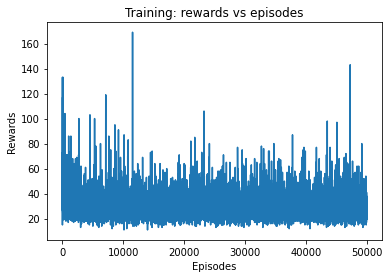

In [8]:
plt.plot(episode_rewards)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Training: rewards vs episodes')
plt.show()


In [7]:
def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Step: %d" % (step))

    plt.pause(0.001)  # pause for plots to update

    display.clear_output(wait=True)
    display.display(plt.gcf())

# done = False
# state = env.reset()
# step = 0
# while not done:
#     step += 1
#     show_state(env, step)
#     action = policy(env, w, state, 0.0)
#     state, _, done, _ = env.step(action)
